# **자기주도PJT - 기본과제**

**Req-1. basic.ipynb 파일을 생 성 한 후 Hello World 를 출력해 보세요**

In [1]:
print("Hello World")

Hello World


**Req-2. basic.ipynb
파일에 일주일은 몇 초 인지 표시하는 코드를 자유롭게 Colab
에 추가 후 실행해 보세요.**

In [3]:
weeksdays = 7
dayperhour = 24
hourperminute = 60
minutepersecond = 60
print(weeksdays*dayperhour*hourperminute*minutepersecond)

604800


**Req-3. basic.ipynb
파일에 Colab 의 코드 스니펫 창의 다음의 코드들을 추가 후
실행해 보세요**
- Visualization: Linked Brushing in Altair
- Camera Capture 를 추가해 본인의 얼굴을 찍어 보세요
- 추가로 1 개의 코드 스니펫을 자유롭게 선택 하여 올려 놓습니다
실행결과를
그대로 저장해 주세요

In [4]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

interval = alt.selection_interval()

base = alt.Chart(cars).mark_point().encode(
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

base.encode(x='Acceleration') | base.encode(x='Horsepower')

alt.HConcatChart(...)

In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [7]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_bar().encode(
  x=alt.X('Miles_per_Gallon', bin=True),
  y='count()',
)

alt.Chart(...)

**Req-4. basic.ipynb
파일에 Google Drive 연동을 하는 코드를 추가하고 본인의 구글
드라이브 에 임의의 텍스트파일을 저장하는 코드를 작성해보세요 코드
스니펫 의 Mounting Google Drive in your VM 을 사용해도 무방합니다.**

In [8]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [9]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Hello Google Drive!

**Req-5. 다음의 GPU가속 예제코드를 실행해 보고 CPU 사용시 처리시간과 GPU 사용시 처리시간을 비교해 보고 마지막 블럭인“Observe TensorFlow speedup on GPU relative to CPU“의 결과를 복사해서 basic.ipynb의 Req-5 다음에 텍스트 형태로 붙여 주세요.**   
 ☞ https://colab.research.google.com/notebooks/gpu.ipynb


Req.5의 실행결과는 다음과 같습니다.

```
Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.738904218000016
GPU (s):
0.041634316999989096
GPU speedup over CPU: 89x
```


**Req-6. basic.ipynb
파일에 matplotlib 와 OpenCV 의 Drawing API 를 이용하여
화면에 여러 가지 도 형을 그려주는 코드를 작성해 보세요. (난이도 쉬움)**

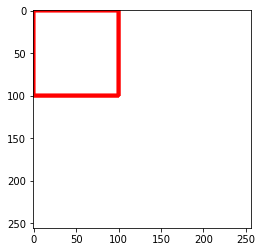

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

buffer = np.full((256,256,3), 255, np.uint8)
cv2.rectangle(buffer,(0,0),(100,100),(255,0,0),3)
plt.imshow(buffer)
plt.show()

In [13]:
help(cv2.rectangle)

Help on built-in function rectangle:

rectangle(...)
    rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
    .   @brief Draws a simple, thick, or filled up-right rectangle.
    .   
    .   The function cv::rectangle draws a rectangle outline or a filled rectangle whose two opposite corners
    .   are pt1 and pt2.
    .   
    .   @param img Image.
    .   @param pt1 Vertex of the rectangle.
    .   @param pt2 Vertex of the rectangle opposite to pt1 .
    .   @param color Rectangle color or brightness (grayscale image).
    .   @param thickness Thickness of lines that make up the rectangle. Negative values, like #FILLED,
    .   mean that the function has to draw a filled rectangle.
    .   @param lineType Type of the line. See #LineTypes
    .   @param shift Number of fractional bits in the point coordinates.
    
    
    
    rectangle(img, rec, color[, thickness[, lineType[, shift]]]) -> img
    .   @overload
    .   
    .   use `rec` parameter as alterna